# North Atlantic Basin (CM2.6)

In [12]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()

# set the options programatically, or through their HTML repr
options.worker_memory = 30  # 10 GB of memory per worker.

# Create a cluster with those options
cluster = gateway.new_cluster(options)
cluster.scale(15)
client = cluster.get_client()

In [13]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.eaea5bb79b764730a15115b1a372067d/status,


In [15]:
cluster.close()
client.close()

In [1]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
from fastjmd95 import jmd95numba
import gcsfs
import gcm_filters
import xgcm
from xhistogram.xarray import histogram

In [2]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
rho = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/surf_ds/rho.zarr'))
natl = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/outliers_rm/basin-histograms/natl_hist.zarr'))
natl_surf = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/basin-histograms/natl_hist_surf.zarr'))
mask = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/outliers_rm/mask.zarr'))

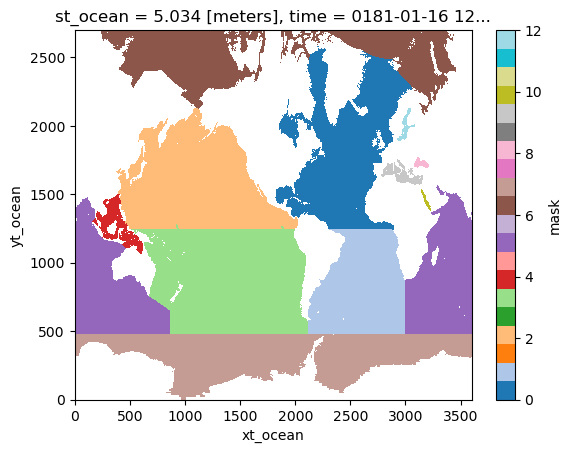

In [15]:
mask.mask.plot(cmap='tab20')

# 1) Spatial map of NASTMW outcropping in each month

In [4]:
rho0 = rho.rho_test
delta_rho = 0.1
rho_bins = np.arange(1015, 1035, delta_rho)
atl_mask = mask.mask==0

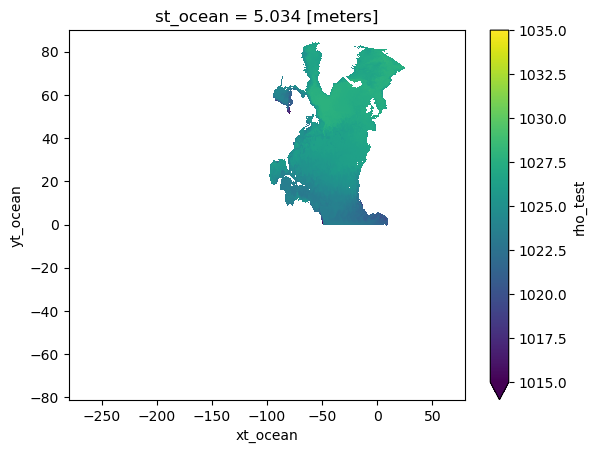

In [5]:
rho0[0].where(atl_mask).plot(vmin=1015, vmax=1035)

In [22]:
rho_bins[115]

1026.5000000000027

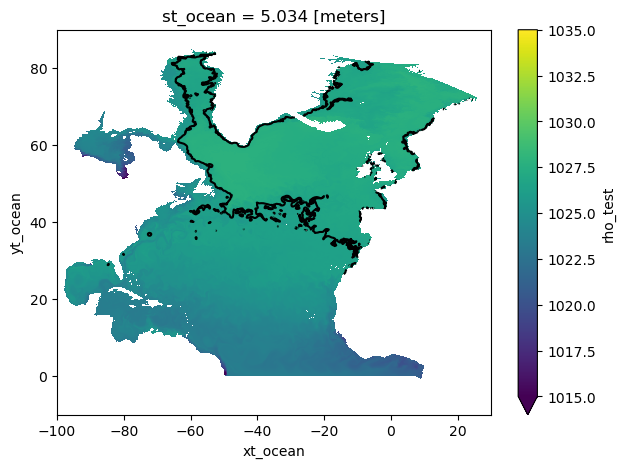

In [8]:
#plot contour of 26.5 isopycnal - rep NASTMW
fig, ax = plt.subplots(figsize=(7,5))
selection = dict(xt_ocean=slice(-100, 30), yt_ocean=slice(-10, None))
rho0[0].where(atl_mask).sel(**selection).plot(vmin=1015, vmax=1035, ax=ax)
C = rho0[0].where(atl_mask).sel(**selection).plot.contour(colors='k', levels=[rho_bins[115]], ax=ax)#, add_colorbar=True)
#C.collections[115].set_color('k')
#C.collections[115].set_linewidth(1.5);
#plt.clabel(C);

## Groupby $\rho$ and plot each month's contour map

In [9]:
rho_gb = rho0.where(atl_mask).sel(**selection).groupby('time.month').mean('time')
#rho_gb_chunk = rho_gb.chunk({'yt_ocean':389, 'xt_ocean':500})

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 64
  result = blockwise(


In [10]:
rho_gb

<xarray.DataArray 'rho_test' (month: 12, yt_ocean: 1556, xt_ocean: 1300)>
dask.array<transpose, shape=(12, 1556, 1300), dtype=float64, chunksize=(1, 338, 450), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -99.95 -99.85 -99.75 ... 29.75 29.85 29.95
  * yt_ocean  (yt_ocean) float64 -9.999 -9.9 -9.802 -9.703 ... 89.89 89.94 89.98
    lat       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1556, 1300), meta=np.ndarray>
    lon       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1556, 1300), meta=np.ndarray>
    st_ocean  float64 ...
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

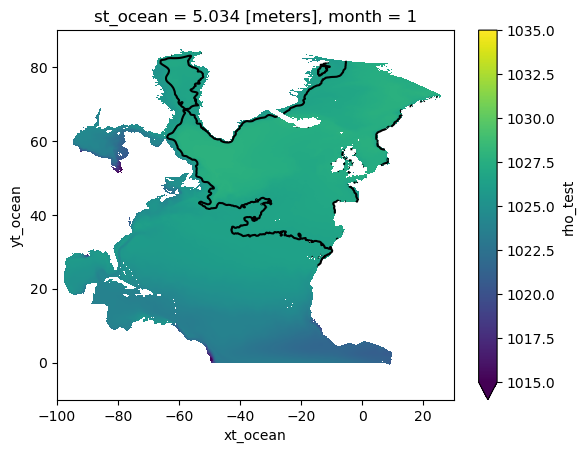

In [38]:
rho_gb[0].plot.contour(colors='k', levels=[rho_bins[115]])
rho_gb[0].plot(vmin=1015, vmax=1035)

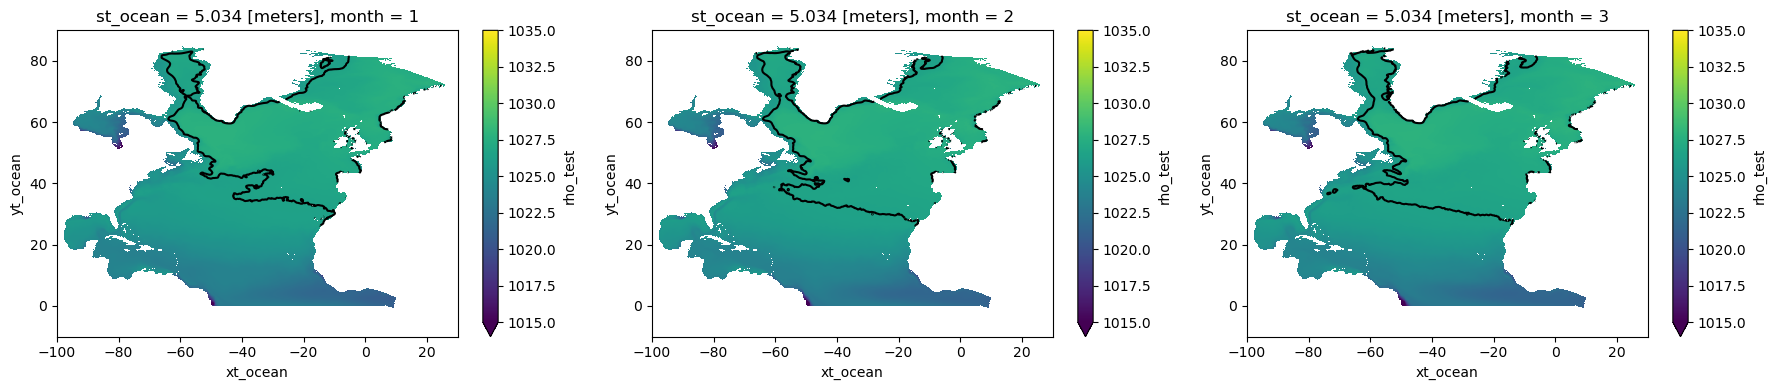

In [17]:
#first 3 months
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

rho_gb[0].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[0])
rho_gb[0].plot(vmin=1015, vmax=1035, ax=axes[0])

rho_gb[1].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[1])
rho_gb[1].plot(vmin=1015, vmax=1035, ax=axes[1])

rho_gb[2].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[2])
rho_gb[2].plot(vmin=1015, vmax=1035, ax=axes[2])

plt.tight_layout();

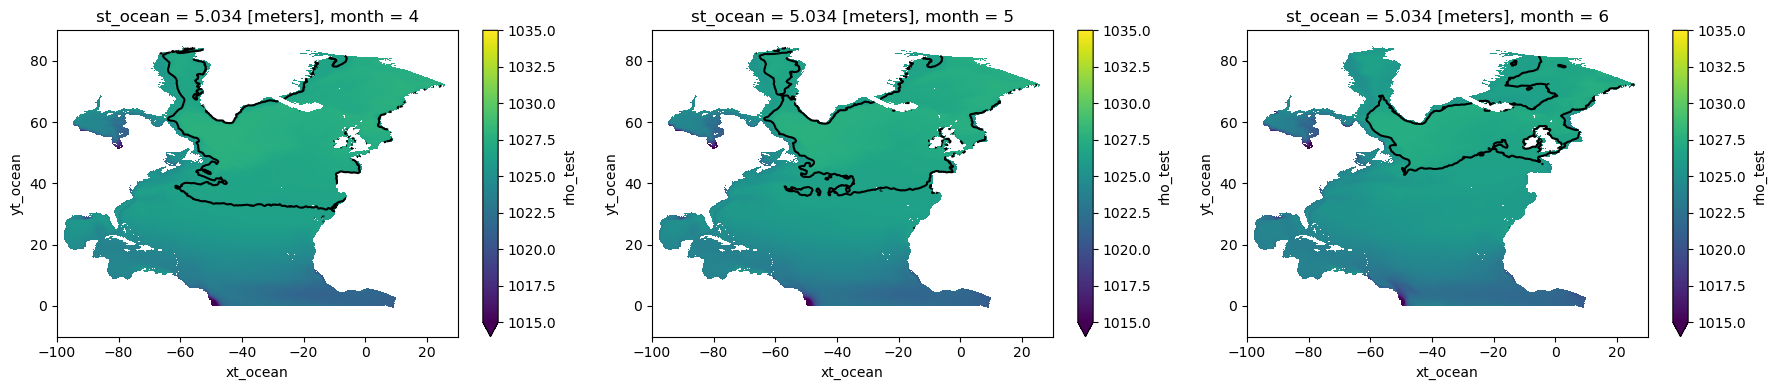

In [18]:
# April, May, June
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

rho_gb[3].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[0])
rho_gb[3].plot(vmin=1015, vmax=1035, ax=axes[0])

rho_gb[4].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[1])
rho_gb[4].plot(vmin=1015, vmax=1035, ax=axes[1])

rho_gb[5].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[2])
rho_gb[5].plot(vmin=1015, vmax=1035, ax=axes[2])

plt.tight_layout();

In [ ]:
#July, Aug, Sept
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

rho_gb[6].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[0])
rho_gb[6].plot(vmin=1015, vmax=1035, ax=axes[0])

rho_gb[7].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[1])
rho_gb[7].plot(vmin=1015, vmax=1035, ax=axes[1])

rho_gb[8].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[2])
rho_gb[8].plot(vmin=1015, vmax=1035, ax=axes[2])

plt.tight_layout();

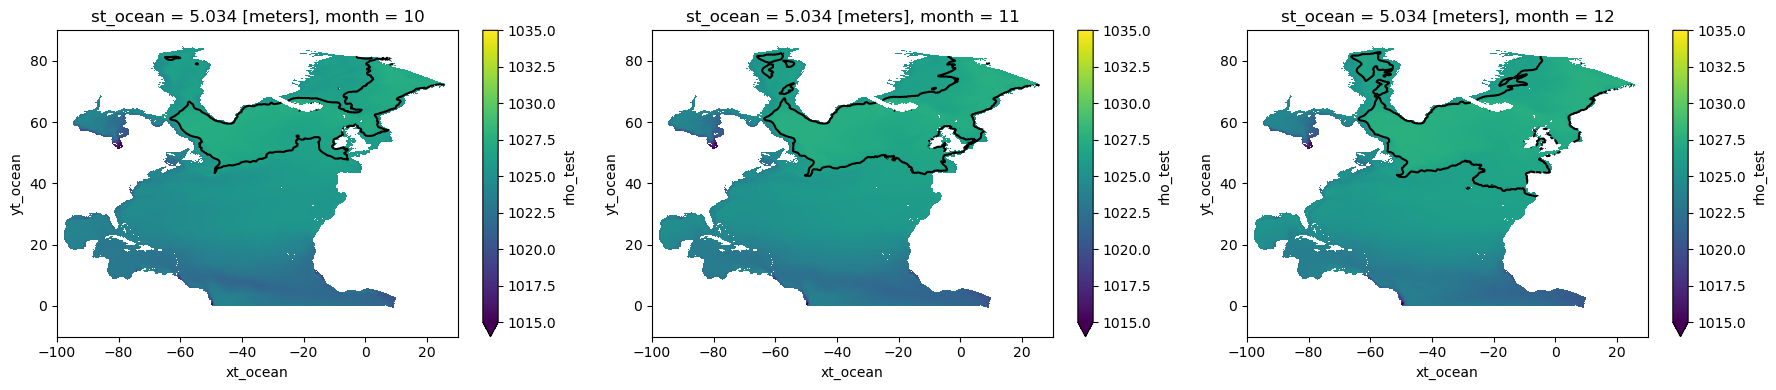

In [20]:
#Oct, Nov, Dec
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

rho_gb[9].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[0])
rho_gb[9].plot(vmin=1015, vmax=1035, ax=axes[0])

rho_gb[10].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[1])
rho_gb[10].plot(vmin=1015, vmax=1035, ax=axes[1])

rho_gb[11].plot.contour(colors='k', levels=[rho_bins[115]], ax=axes[2])
rho_gb[11].plot(vmin=1015, vmax=1035, ax=axes[2])

plt.tight_layout();

# Formation budget of NASTMW

In [41]:
nastmw = natl.sel(rho0_bin=1026.5, method='nearest')
nastmw_surf = natl_surf.sel(rho0_bin=1026.5, method='nearest')

In [42]:
nastmw_gb = nastmw.groupby('time.month').mean()
nastmw_gb_surf = nastmw_surf.groupby('time.month').mean()

In [45]:
nastmw_merged = xr.merge([nastmw_gb, nastmw_gb_surf])

In [46]:
nastmw_merged

<xarray.Dataset>
Dimensions:          (month: 12)
Coordinates:
    rho0_bin         float64 1.026e+03
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    cabbeling        (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    rho_lap          (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sss              (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sst              (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    OMEGA_surf_heat  (month) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    OMEGA_surf_salt  (month) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [48]:
(nastmw_gb.rho_lap + nastmw_gb.cabbeling - nastmw_gb.sst - nastmw_gb.sss)[0].values

array(1.16415322e-10)

In [50]:
def ann_mean(ds, basin_title):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,5))
    line_mix=['blue', 'k', 
                 'orange', 'green']
    line_surf = ['purple', 'yellow']
    for (i,j) in zip(list(ds.data_vars)[:-2], line_mix): #slicing to mixing terms only
        (ds[i]/1e6).plot(label=f'{i}', color=j, ax=ax0)
    for (i,j) in zip(list(ds.data_vars)[-2:], line_surf): #slicing to surf terms only
        (ds[i]/1e6).plot(label=f'{i}', color=j, ax=ax1)
  
    ax0.legend()
    #ax0.set_xlim(1016,1030)
    ax0.set_ylabel(r'Transformation (Sv / $\Delta \sigma_0$)', fontsize=16)
    ax0.grid()
    ax0.set_title('Mixing terms')
    ax0.set_xlabel('')
    
    ax1.legend()
    #ax1.set_xlim(1016,1030)
    ax1.set_ylabel('')
    ax1.grid()
    ax1.set_title('Surface terms')
    ax1.set_xlabel('')
    
    fig.supxlabel('Month', fontsize=16)
    plt.suptitle('Monthly Mean Transformation', fontsize=20)
    plt.savefig(f'{basin_title}_mo_mean_hist_fig.pdf');

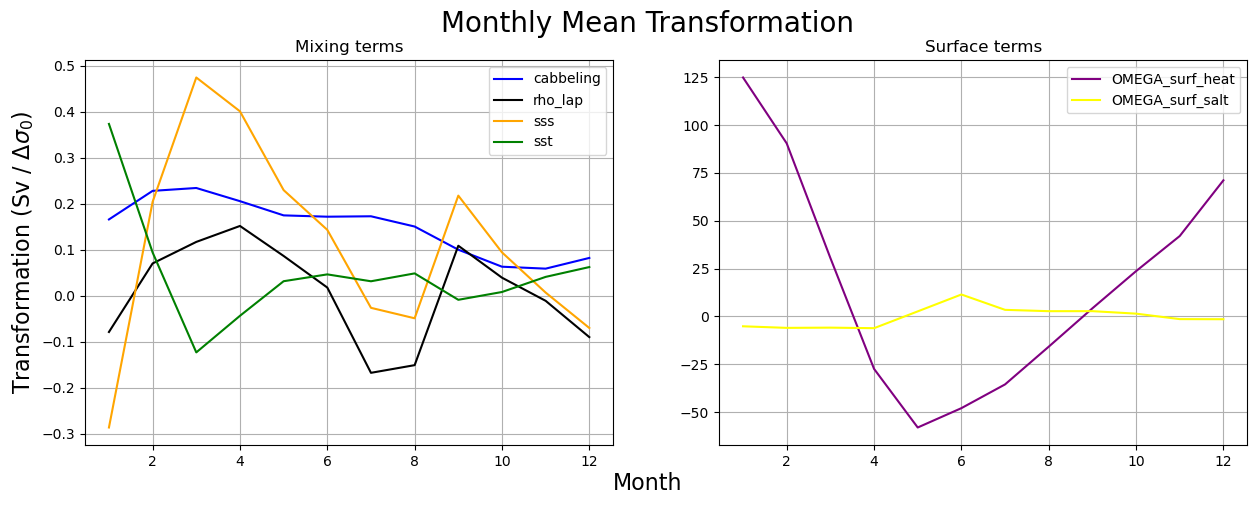

In [51]:
ann_mean(nastmw_merged, 'NATL')

In [55]:
client.close()
cluster.close()